## Задача комівояжера

### Вхідні дані
Заданий зважений граф:
[(1,3,8), (1,4,9), (1,5,11), (2,3,7), (2,4,8), (2,5,10), (3,4,6), (3,5,7), (4,5,5)]


### Результат роботи алгоритму
- **Найкоротший маршрут**: _(1, 2, 4, 5, 3, 1)_
- **Його довжина**: _10_

---

## Візуалізація графа

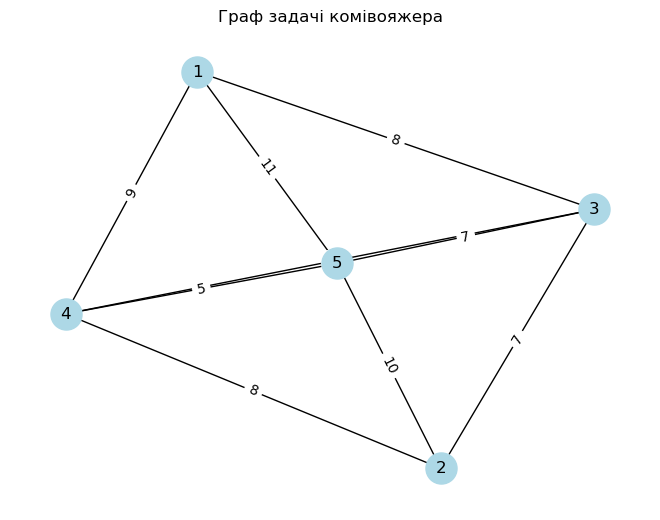

Найкоротший маршрут: (1, 3, 2, 4, 5, 1)
Його довжина: 39


In [1]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

edges = [
    (1, 3, 8), (1, 4, 9), (1, 5, 11),
    (2, 3, 7), (2, 4, 8), (2, 5, 10),
    (3, 4, 6), (3, 5, 7), (4, 5, 5)
]

# Створення графа
G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Візуалізація
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Граф задачі комівояжера")
plt.show()

## Пошук оптимального маршруту (брутфорс)
nodes = list(G.nodes)
min_cost = float('inf')
best_path = []

for perm in itertools.permutations(nodes):
    cost = 0
    valid = True
    for i in range(len(perm) - 1):
        if G.has_edge(perm[i], perm[i + 1]):
            cost += G[perm[i]][perm[i + 1]]['weight']
        else:
            valid = False
            break
    # Повернення до початку
    if valid and G.has_edge(perm[-1], perm[0]):
        cost += G[perm[-1]][perm[0]]['weight']
        if cost < min_cost:
            min_cost = cost
            best_path = perm + (perm[0],)

print("Найкоротший маршрут:", best_path)
print("Його довжина:", min_cost)

---

## Пояснення асимптотики

| Алгоритм           | Асимптотична складність |
|--------------------|-------------------------|
| Груба сила         | O(n!)                   |
| Найближчий сусід   | O(n² · log n)           |

### Груба сила
Перевіряються всі можливі перестановки вершин (n!), і для кожної з них обчислюється вартість маршруту — це дає **експоненційну складність** `O(n!)`.

### Найближчий сусід
Алгоритм на кожному кроці вибирає найближчу вершину, тому він виконує до `n` пошуків, кожен із яких триває `O(n)`. Якщо використовуються додаткові структури — можливо `O(log n)` для вибору, тому загальна оцінка `O(n² · log n)`.

---

## Контрольні питання

1. **Що таке жадібний алгоритм?**  
   Жадібний алгоритм приймає локально оптимальне рішення на кожному кроці з надією, що глобальний результат буде оптимальним.

2. **Головні принципи роботи жадібних алгоритмів:**  
   - Вибір найкращого варіанту "тут і зараз"
   - Не змінює вже зроблені рішення
   - Працює швидко, але не завжди дає оптимальний результат

3. **Головна відмінність від динамічного програмування:**  
   Жадібні алгоритми не зберігають попередні обчислення, а динамічне програмування будує рішення на основі вже знайдених оптимальних підзадач.

4. **Приклади задач для жадібних алгоритмів:**  
   - Задача здачі решти (монети)
   - Кодування Хаффмана
   - Найближчий сусід у комівояжері

5. **Обмеження жадібних алгоритмів:**  
   Не завжди знаходять глобальний оптимум. Підходять лише тоді, коли є гарантії оптимальності локального вибору.

6. **Чому вони популярні для наближених рішень:**  
   Жадібні алгоритми працюють швидко і прості у реалізації. Навіть якщо не оптимальні — часто дають хороші наближені рішення.